In [107]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


In [108]:
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.callbacks import History

# Modelowanie szeregów czasowych przy użyciu sieci rekurencyjnych

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

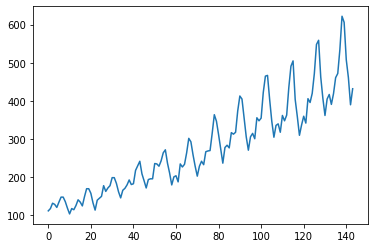

In [109]:
import pandas
import matplotlib.pyplot as plt
dataframe = pandas.read_csv('Dane/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataframe)
plt.show()

In [110]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

numpy.random.seed(7)

**LSTM Network for Regression**

We can phrase the problem as a regression problem.

That is, given the number of passengers (in units of thousands) this month, what is the number of passengers next month?

We can write a simple function to convert our single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.

In [123]:
dataset = dataframe.values
dataset = dataset.astype('float32')

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [124]:
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)

In [125]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [126]:
# # normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [127]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [128]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [129]:
trainX

array([[0.02588999, 0.04530746, 0.09061491],
       [0.04530746, 0.09061491, 0.08090615],
       [0.09061491, 0.08090615, 0.05501619],
       [0.08090615, 0.05501619, 0.10032365],
       [0.05501619, 0.10032365, 0.14239484],
       [0.10032365, 0.14239484, 0.14239484],
       [0.14239484, 0.14239484, 0.10355988],
       [0.14239484, 0.10355988, 0.04854369],
       [0.10355988, 0.04854369, 0.        ],
       [0.04854369, 0.        , 0.04530746],
       [0.        , 0.04530746, 0.03559873],
       [0.04530746, 0.03559873, 0.07119742],
       [0.03559873, 0.07119742, 0.11974111],
       [0.07119742, 0.11974111, 0.10032365],
       [0.11974111, 0.10032365, 0.06796119],
       [0.10032365, 0.06796119, 0.14563107],
       [0.06796119, 0.14563107, 0.21359226],
       [0.14563107, 0.21359226, 0.21359226],
       [0.21359226, 0.21359226, 0.17475727],
       [0.21359226, 0.17475727, 0.09385115],
       [0.17475727, 0.09385115, 0.03236246],
       [0.09385115, 0.03236246, 0.11650488],
       [0.

In [130]:
#reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [131]:
print(trainX.shape)
trainX

(92, 1, 3)


array([[[0.02588999, 0.04530746, 0.09061491]],

       [[0.04530746, 0.09061491, 0.08090615]],

       [[0.09061491, 0.08090615, 0.05501619]],

       [[0.08090615, 0.05501619, 0.10032365]],

       [[0.05501619, 0.10032365, 0.14239484]],

       [[0.10032365, 0.14239484, 0.14239484]],

       [[0.14239484, 0.14239484, 0.10355988]],

       [[0.14239484, 0.10355988, 0.04854369]],

       [[0.10355988, 0.04854369, 0.        ]],

       [[0.04854369, 0.        , 0.04530746]],

       [[0.        , 0.04530746, 0.03559873]],

       [[0.04530746, 0.03559873, 0.07119742]],

       [[0.03559873, 0.07119742, 0.11974111]],

       [[0.07119742, 0.11974111, 0.10032365]],

       [[0.11974111, 0.10032365, 0.06796119]],

       [[0.10032365, 0.06796119, 0.14563107]],

       [[0.06796119, 0.14563107, 0.21359226]],

       [[0.14563107, 0.21359226, 0.21359226]],

       [[0.21359226, 0.21359226, 0.17475727]],

       [[0.21359226, 0.17475727, 0.09385115]],

       [[0.17475727, 0.09385115, 0.03236

In [132]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
model.fit(trainX, trainY, epochs=100, batch_size=1, validation_split=0.1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 4)                 128       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
82/82 [==============================] - 0s 6ms/step - loss: 0.1051 - val_loss: 0.3927
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.0506 - val_loss: 0.2354
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.0268 - val_loss: 0.1413
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.1087
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0935
Epoch 6/100
82/82

82/82 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0122
Epoch 77/100
82/82 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0114
Epoch 78/100
82/82 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0123
Epoch 79/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0132
Epoch 80/100
82/82 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0122
Epoch 81/100
82/82 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0145
Epoch 82/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0118
Epoch 83/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0143
Epoch 84/100
82/82 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0134
Epoch 85/100
82/82 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0134
Epoch 86/100


In [133]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.29 RMSE
Test Score: 74.87 RMSE


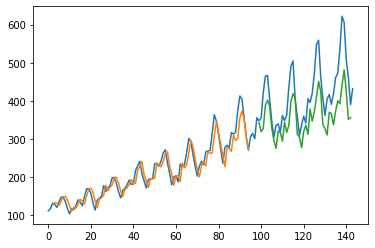

In [136]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()